In [ ]:
'''
Clean WBPC data
'''

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [10]:
columnNames = ['person_id', 'outcome', 'time', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']

for i in range(13, 33):
    if i < 23:
        columnNames.append(columnNames[i-10] + " SE")
    else:
        columnNames.append("worst " + columnNames[i-20])
columnNames.append('tumor size')
columnNames.append('lymph node status')

columnNames

['person_id',
 'outcome',
 'time',
 'radius',
 'texture',
 'perimeter',
 'area',
 'smoothness',
 'compactness',
 'concavity',
 'concave points',
 'symmetry',
 'fractal dimension',
 'radius SE',
 'texture SE',
 'perimeter SE',
 'area SE',
 'smoothness SE',
 'compactness SE',
 'concavity SE',
 'concave points SE',
 'symmetry SE',
 'fractal dimension SE',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension',
 'tumor size',
 'lymph node status']

In [12]:
df = pd.read_csv('../data/wpbc.data', names = columnNames)
df.head()

,person_id,outcome,time,radius,texture,perimeter,area,smoothness,compactness,concavity,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor size,lymph node status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [21]:
df.replace("?", np.nan, inplace=True)

In [23]:
df.isnull().sum()

person_id                  0
outcome                    0
time                       0
radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave points             0
symmetry                   0
fractal dimension          0
radius SE                  0
texture SE                 0
perimeter SE               0
area SE                    0
smoothness SE              0
compactness SE             0
concavity SE               0
concave points SE          0
symmetry SE                0
fractal dimension SE       0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
tumor size                 0
lymph node sta

In [28]:
df['lymph node status'].fillna(df['lymph node status'].mode()[0], inplace=True)

In [29]:
df.isnull().sum()

person_id                  0
outcome                    0
time                       0
radius                     0
texture                    0
perimeter                  0
area                       0
smoothness                 0
compactness                0
concavity                  0
concave points             0
symmetry                   0
fractal dimension          0
radius SE                  0
texture SE                 0
perimeter SE               0
area SE                    0
smoothness SE              0
compactness SE             0
concavity SE               0
concave points SE          0
symmetry SE                0
fractal dimension SE       0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
tumor size                 0
lymph node sta

In [35]:
df['outcome'] = df['outcome'].apply(lambda x : 0 if x == 'N' else 1)
df['lymph node status'] = df['lymph node status'].astype(int)
df

,person_id,outcome,time,radius,texture,perimeter,area,smoothness,compactness,concavity,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,tumor size,lymph node status
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,942640,0,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,943471,0,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,94547,0,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,947204,1,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,0


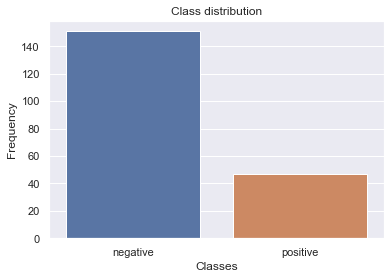

In [37]:
sns.set(style="darkgrid")
sns.barplot(x="Class", y="cnt", data = {"Class": ['negative', 'positive'], "cnt": [len(df[df['outcome'] == 0]), len(df[df['outcome'] == 1])]})
plt.title("Class distribution")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

In [38]:
df.to_csv('../data/wbpc.csv')